In [62]:
!pip install pykan

In [63]:
# Import necessary libraries

import torch
from kan import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
df = pd.read_csv('/content/train_clean.csv')

In [64]:
df = df[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Title', 'Family_Size']]

In [65]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical variables
categorical_features = ['Embarked', 'Sex', 'Title']
one_hot = encoder.fit_transform(df[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
# Get feature names
feature_names = encoder.get_feature_names_out(categorical_features)

# Convert the result into a DataFrame
one_hot_df = pd.DataFrame(one_hot, columns=feature_names)

# Drop the original categorical variables from the original DataFrame
df = df.drop(categorical_features, axis=1)

# Concatenate the original DataFrame with the one-hot DataFrame
df = pd.concat([df, one_hot_df], axis=1)

print(df)

      Age     Fare  Parch  Pclass  SibSp  Survived  Family_Size  Embarked_C  \
0    22.0   7.2500      0       3      1       0.0            1         0.0   
1    38.0  71.2833      0       1      1       1.0            1         1.0   
2    26.0   7.9250      0       3      0       1.0            0         0.0   
3    35.0  53.1000      0       1      1       1.0            1         0.0   
4    35.0   8.0500      0       3      0       0.0            0         0.0   
..    ...      ...    ...     ...    ...       ...          ...         ...   
886  27.0  13.0000      0       2      0       0.0            0         0.0   
887  19.0  30.0000      0       1      0       1.0            0         0.0   
888  22.0  23.4500      2       3      1       0.0            3         0.0   
889  26.0  30.0000      0       1      0       1.0            0         1.0   
890  32.0   7.7500      0       3      0       0.0            0         0.0   

     Embarked_Q  Embarked_S  Sex_female  Sex_male  

In [67]:
col_names= [col for col in df.columns]

In [68]:
col_names

['Age',
 'Fare',
 'Parch',
 'Pclass',
 'SibSp',
 'Survived',
 'Family_Size',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_female',
 'Sex_male',
 'Title_Dr',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rev']

In [69]:
targ_name= ['Survived']
col_names.remove(targ_name[0])

In [70]:
col_names= ['Age', 'Fare', 'Parch', 'Class', 'Sib', 'FSize', 'E_C', 'E_Q', 'E_S', 'fem', 'male', 'Dr', 'Mas', 'Miss', 'Mr', 'Mrs', 'Rev']

In [71]:
X_values = df.drop('Survived', axis=1).values
y_values = df['Survived'].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)

In [73]:
X_train.shape

(712, 17)

In [74]:
# Create a dataset
dataset = {'train_input': X_train, 'train_label': y_train, 'test_input': X_test, 'test_label': y_test}

# Initialize KAN
model = KAN(width=[X_train.shape[1], 1, 1], grid=3, k=3)

In [75]:
# Convert numpy arrays to PyTorch tensors
train_input_tensor = torch.tensor(dataset['train_input'])
train_label_tensor = torch.tensor(dataset['train_label'])
test_input_tensor = torch.tensor(dataset['test_input'])
test_label_tensor = torch.tensor(dataset['test_label'])

description:   0%|                                                          | 0/5 [1:09:51<?, ?it/s]


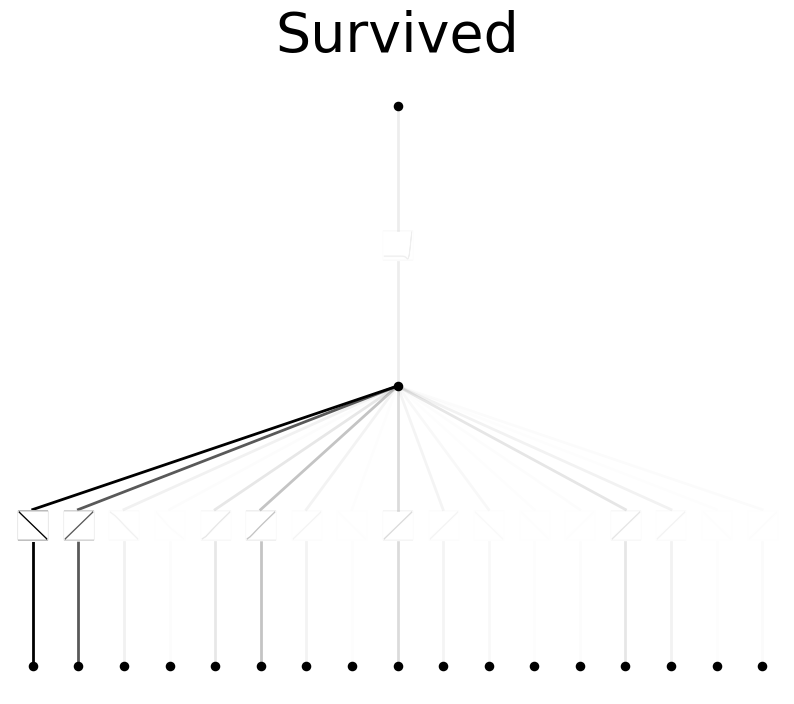

In [76]:
# plot KAN at initialization
model(train_input_tensor);
model.plot(beta=3, out_vars= targ_name, scale= 1)

In [77]:
# Train the model
model.train({'train_input': train_input_tensor, 'train_label': train_label_tensor, 'test_input': test_input_tensor, 'test_label': test_label_tensor}, opt="LBFGS", steps=5)

train loss: 4.84e-01 | test loss: 4.94e-01 | reg: 8.13e+00 : 100%|████| 5/5 [00:04<00:00,  1.18it/s]


{'train_loss': [array(0.48448729),
  array(0.48448345),
  array(0.48448339),
  array(0.48448339),
  array(0.48448339)],
 'test_loss': [array(0.49382236),
  array(0.49382625),
  array(0.49383303),
  array(0.49383303),
  array(0.49383301)],
 'reg': [array(7.17371705),
  array(7.71226406),
  array(7.89908357),
  array(8.03699079),
  array(8.1317867)]}

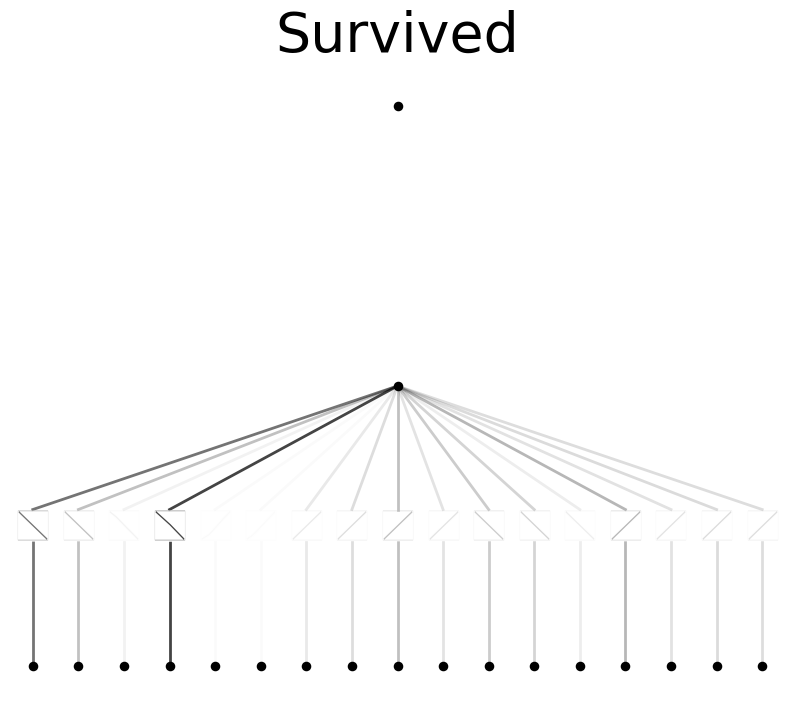

In [78]:
# Plot the trained KAN
model.plot(beta=3, out_vars= targ_name, scale= 1)

In [79]:
# Set activation functions to be symbolic
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
model.auto_symbolic(lib=lib)

# Continue training to almost machine precision
model.train({'train_input': train_input_tensor, 'train_label': train_label_tensor, 'test_input': test_input_tensor, 'test_label': test_label_tensor}, opt="LBFGS", steps=10)

# Obtain the symbolic formula
print(model.symbolic_formula()[0][0])

fixing (0,0,0) with abs, r2=0.99999751706541
fixing (0,1,0) with abs, r2=0.9999999959723506
fixing (0,2,0) with abs, r2=0.9999950514180509
fixing (0,3,0) with x^4, r2=0.9999999999999635
fixing (0,4,0) with sin, r2=0.9998949337160308
fixing (0,5,0) with sin, r2=0.9997904079229545
fixing (0,6,0) with exp, r2=1.000000000000001
fixing (0,7,0) with exp, r2=1.0000000000000016
fixing (0,8,0) with exp, r2=1.0000000000000013
fixing (0,9,0) with exp, r2=1.0000000000000018
fixing (0,10,0) with exp, r2=1.0000000000000018
fixing (0,11,0) with exp, r2=1.000000000000005
fixing (0,12,0) with exp, r2=1.0000000000000027
fixing (0,13,0) with exp, r2=1.0000000000000016
fixing (0,14,0) with exp, r2=1.0000000000000018
fixing (0,15,0) with exp, r2=1.0000000000000018
fixing (0,16,0) with exp, r2=1.0000000000000062
fixing (1,0,0) with x^2, r2=0.003883552719944672


train loss: 4.84e-01 | test loss: 4.94e-01 | reg: 8.12e+00 : 100%|██| 10/10 [00:01<00:00,  8.68it/s]


0.38
